<a id='table_of_contents'></a>

# Table of Contents
0. [Import Libraries and Data](#imports) 
1. [Data Exploration](#data_exploration) 
3. [Clrean Data](#clean_data)
4. [Netfilx Analysis](#netflix)
5. [Movies vs TV Shows](#comparsion)

<a id='imports'></a>
# Import Libraries and Data
[Back to top](#table_of_contents)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netflix_df = pd.read_csv("data/netflix_titles.csv")

<a id='data_exploration'></a>
# Data Exploration
[Back to top](#table_of_contents)

In [3]:
netflix_df.shape

(8807, 12)

In [4]:
netflix_df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4054,s4055,TV Show,Cricket Fever: Mumbai Indians,NaN,NaN,India,"March 1, 2019",2019,TV-MA,1 Season,"Docuseries, International TV Shows",Follow Indian Premier League champions Mumbai ...
7680,s7681,Movie,Oru Vishsheshapetta Biryani Kissa,Kiran Narayanan,"Nedumudi Venu, V.K. Sriraman, Lena, Sunil Sukh...",India,"August 1, 2018",2017,TV-14,122 min,"Comedies, Dramas, International Movies",When the village's biryani cook unexpectedly p...
885,s886,Movie,Table Manners,Leli Maki,"Diaan Lawrenson, Renate Stuurman, Neels Van Ja...","Canada, South Africa","May 14, 2021",2018,TV-MA,104 min,"Comedies, Dramas, International Movies",When a housewife's picture-perfect life comes ...
7855,s7856,Movie,Rememory,Mark Palansky,"Peter Dinklage, Julia Ormond, Martin Donovan, ...","United Kingdom, United States, Canada","June 1, 2020",2017,PG-13,112 min,"Dramas, Sci-Fi & Fantasy",A psychologist is murdered after unveiling a b...
1266,s1267,Movie,Tony Manero,Pablo Larraín,"Alfredo Castro, Paola Lattus, Héctor Morales, ...","Chile, Brazil","February 26, 2021",2008,TV-MA,97 min,"Dramas, Independent Movies, International Movies",Amid the violence of Pinochet's reign in 1978 ...


In [5]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
netflix_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [7]:
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


<a id='clean_data'></a>
# Clean Data
[Back to top](#table_of_contents)

In [8]:
netflix_df = netflix_df.dropna(subset=['duration'])

movie_mask = netflix_df['type'] == 'Movie'
netflix_df.loc[movie_mask, 'duration'] = (
    netflix_df.loc[movie_mask, 'duration']
    .astype(str)
    .str.extract('(\d+)')[0] 
)
netflix_df.loc[movie_mask, 'duration'] = pd.to_numeric(netflix_df.loc[movie_mask, 'duration'], errors='coerce')

tv_shows = netflix_df[netflix_df["type"]=="TV Show"].copy()
movies = netflix_df[netflix_df["type"]=="Movie"] .copy()

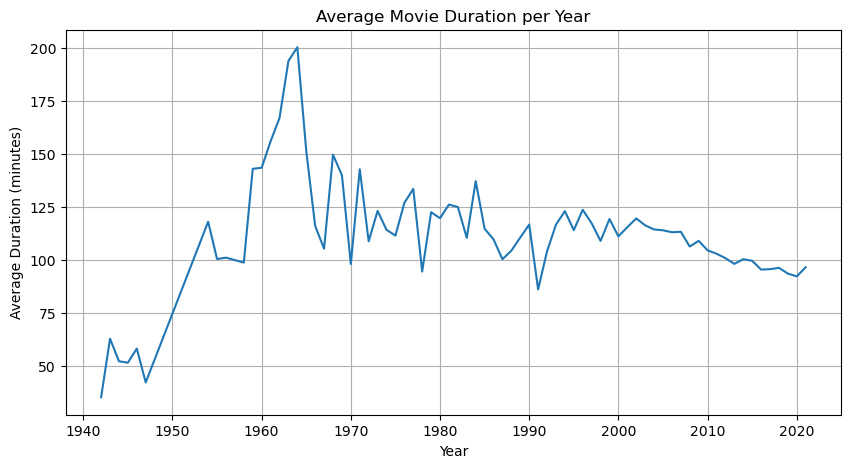

In [9]:
avg_duration_per_year = movies.groupby('release_year')['duration'].mean().sort_index()
plt.figure(figsize=(10, 5))
avg_duration_per_year.plot()
plt.title('Average Movie Duration per Year')
plt.xlabel('Year')
plt.ylabel('Average Duration (minutes)')
plt.grid(True)
plt.show()

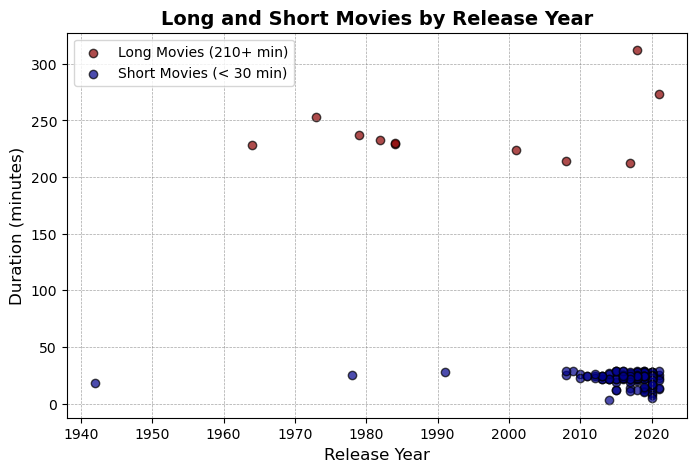

In [10]:
long_movies = movies[movies['duration'] >= 210]
short_movies = movies[movies['duration'] < 30] 

plt.figure(figsize=(8, 5))
plt.scatter(long_movies['release_year'], long_movies['duration'], 
            color='darkred', alpha=0.7, edgecolor='black', label='Long Movies (210+ min)')
plt.scatter(short_movies['release_year'], short_movies['duration'], 
            color='darkblue', alpha=0.7, edgecolor='black', label='Short Movies (< 30 min)')  # Updated label

plt.title('Long and Short Movies by Release Year', fontsize=14, fontweight='bold')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Duration (minutes)', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.show()


In [11]:
longest_movie = long_movies[long_movies['duration'] > 300]
longest_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4253,s4254,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question..."


In [12]:
numeric_mask = pd.to_numeric(netflix_df.loc[movie_mask, 'duration'], errors='coerce')
netflix_df.loc[movie_mask & (numeric_mask > 300), 'duration'] = 90
netflix_df.loc[movie_mask & (numeric_mask < 30), 'type'] = "Short Movie"

movies = netflix_df[netflix_df["type"] == "Movie"].copy()
short_movies = netflix_df[netflix_df["type"] == "Short Movie"].copy()

<a id='netflix'></a>
# Netflix Analysis
[Back to top](#table_of_contents)

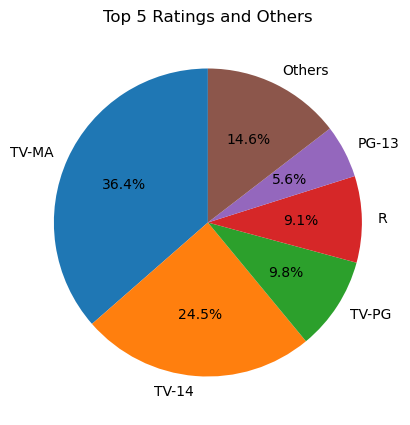

In [13]:
top_5_rating_sum = netflix_df['rating'].value_counts().head(5).sum()
others_rating_sum = netflix_df['rating'].value_counts().sum()-top_5_rating_sum
top_5_rating = netflix_df['rating'].value_counts().head(5)
top_5_rating['Others'] = others_rating_sum
plt.figure(figsize=(5, 5))
plt.pie(top_5_rating, labels=top_5_rating.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Ratings and Others')
plt.show()

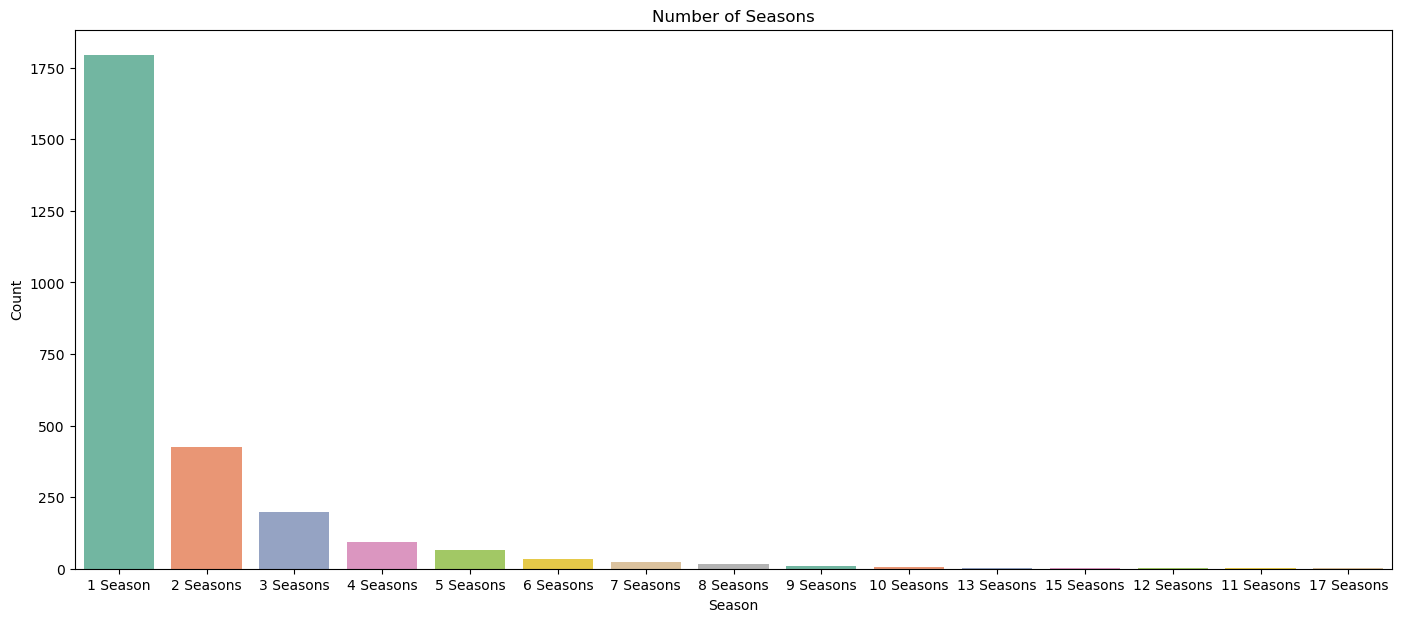

In [14]:
tv_show_seasons = tv_shows['duration'].value_counts()
plt.figure(figsize=(17, 7))
sns.barplot(x=tv_show_seasons.index, y=tv_show_seasons.values, palette='Set2')
plt.title('Number of Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

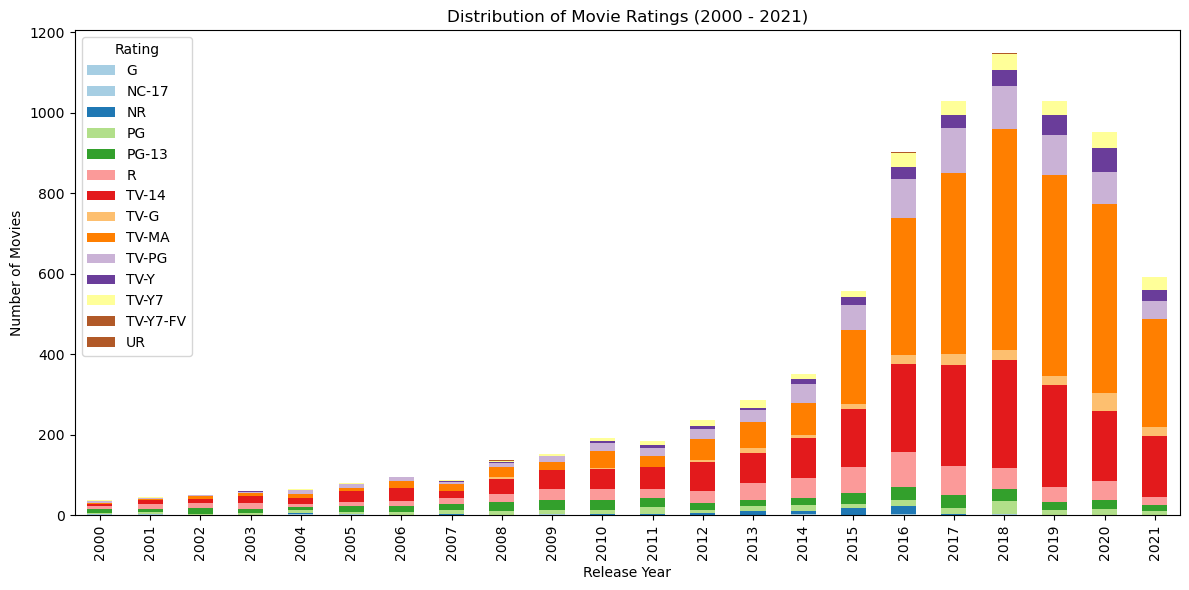

In [15]:
rating_per_year = netflix_df.groupby('release_year')['rating'].value_counts().unstack(fill_value=0)
rating_per_year = rating_per_year[rating_per_year.index > 1999]
rating_per_year.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Paired')
plt.title('Distribution of Movie Ratings (2000 - 2021)')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.legend(title='Rating')
plt.tight_layout()
plt.show()

<a id='comparsion'></a>
# Movies vs TV Shows
[Back to top](#table_of_contents)

In [16]:
def visual(x1,y1,x2,y2,p1,p2,movie_title,movie_tv_show):
    fig , ax = plt.subplots(1,2,figsize=(15,5))

    sns.barplot(x=x1,y=y1,ax=ax[0],palette=p1)
    ax[0].set_title(movie_title)
    sns.barplot(x=x2,y=y2,ax=ax[1],palette=p2)
    ax[1].set_title(movie_tv_show)

    plt.tight_layout()
    plt.show()

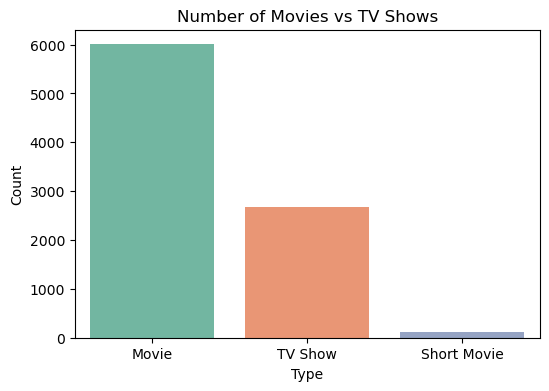

In [17]:
type_counts = netflix_df['type'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')
plt.title('Number of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

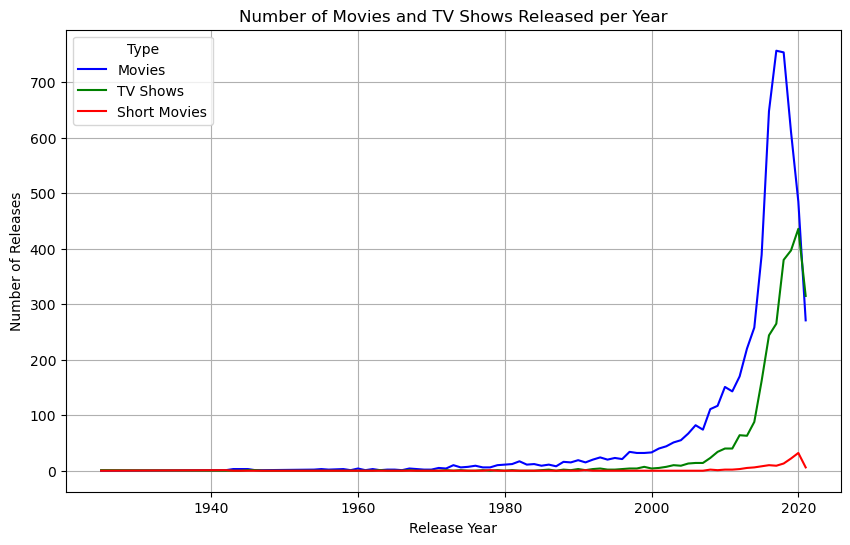

In [18]:
content_counts = netflix_df.groupby(['release_year', 'type']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))

plt.plot(content_counts.index, content_counts['Movie'], linestyle='-', color='blue', label='Movies')
plt.plot(content_counts.index, content_counts['TV Show'], linestyle='-', color='green', label='TV Shows')
plt.plot(content_counts.index, content_counts['Short Movie'], linestyle='-', color='red', label='Short Movies')

plt.title('Number of Movies and TV Shows Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
plt.legend(title="Type")
plt.grid(True)
plt.show()

In [19]:
movie_genres = movies['listed_in'].str.split(', ').explode().value_counts().head(10)
tv_show_genres = tv_shows['listed_in'].str.split(', ').explode().value_counts().head(10)

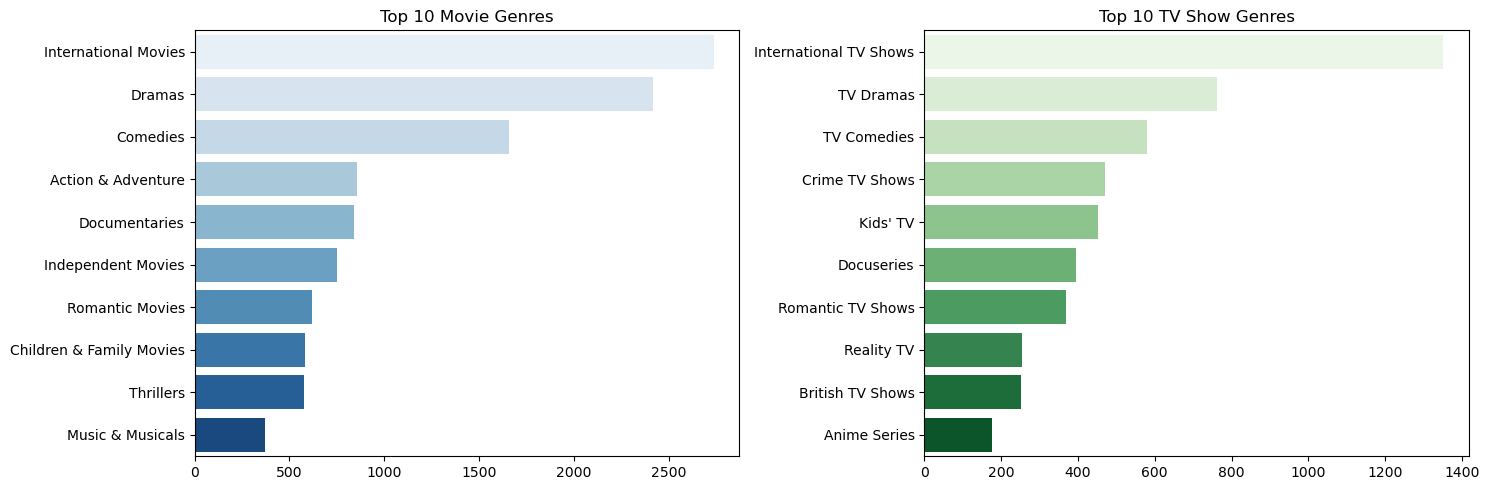

In [20]:
visual(movie_genres.values,movie_genres.index,tv_show_genres.values,tv_show_genres.index,
       'Blues','Greens','Top 10 Movie Genres','Top 10 TV Show Genres')

In [21]:
movie_countrys = movies['country'].str.split(', ').explode().value_counts().head(10)
tv_show_countrys = tv_shows['country'].str.split(', ').explode().value_counts().head(10)

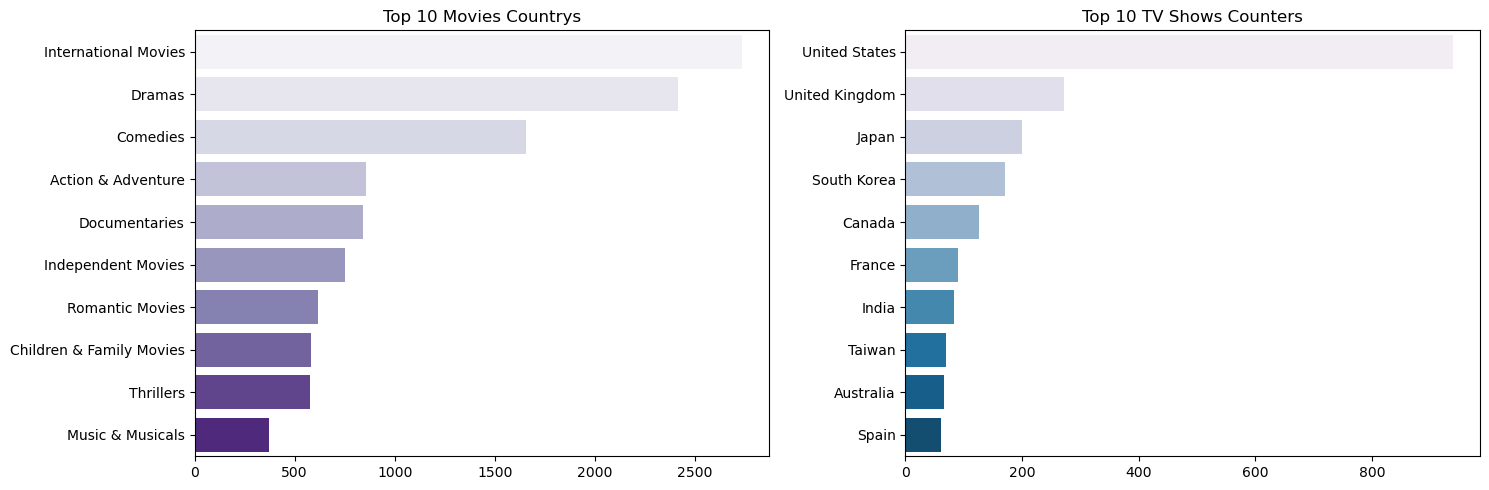

In [22]:
visual(movie_genres.values,movie_genres.index,tv_show_countrys.values,tv_show_countrys.index,
       'Purples','PuBu','Top 10 Movies Countrys','Top 10 TV Shows Counters')

In [23]:
movie_actors = movies['cast'].str.split(', ').explode().value_counts().head(5)
tv_show_actors = tv_shows['cast'].str.split(', ').explode().value_counts().head(5)

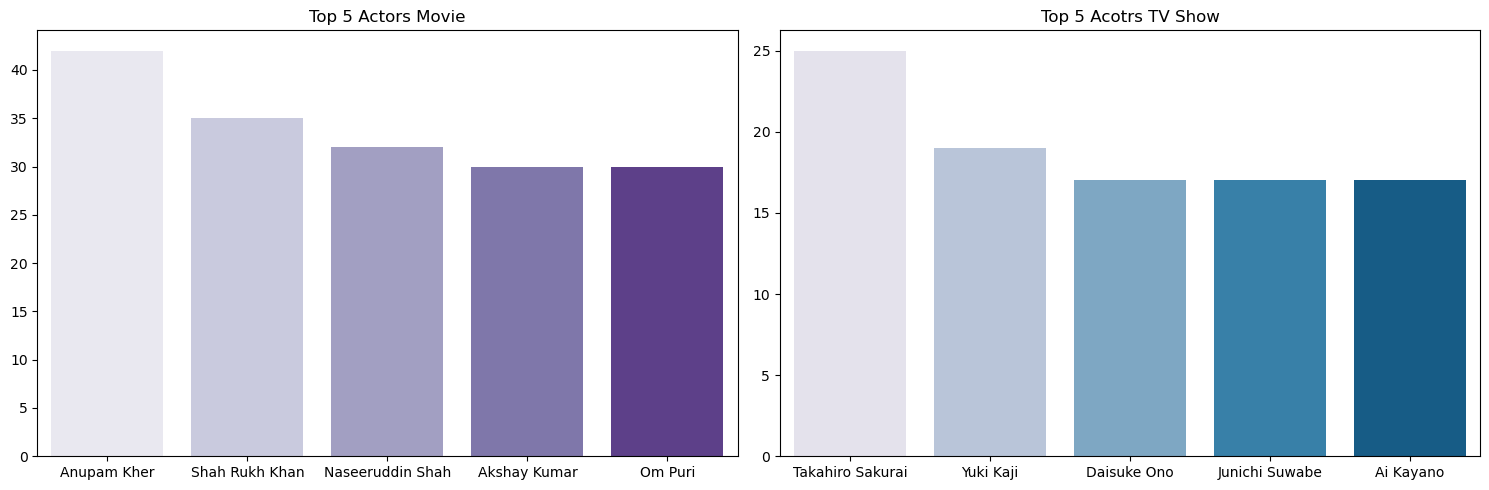

In [24]:
visual(movie_actors.index,movie_actors.values,tv_show_actors.index,tv_show_actors.values,
       'Purples','PuBu','Top 5 Actors Movie','Top 5 Acotrs TV Show')